# Breast Cancer Classfication with Neural Network

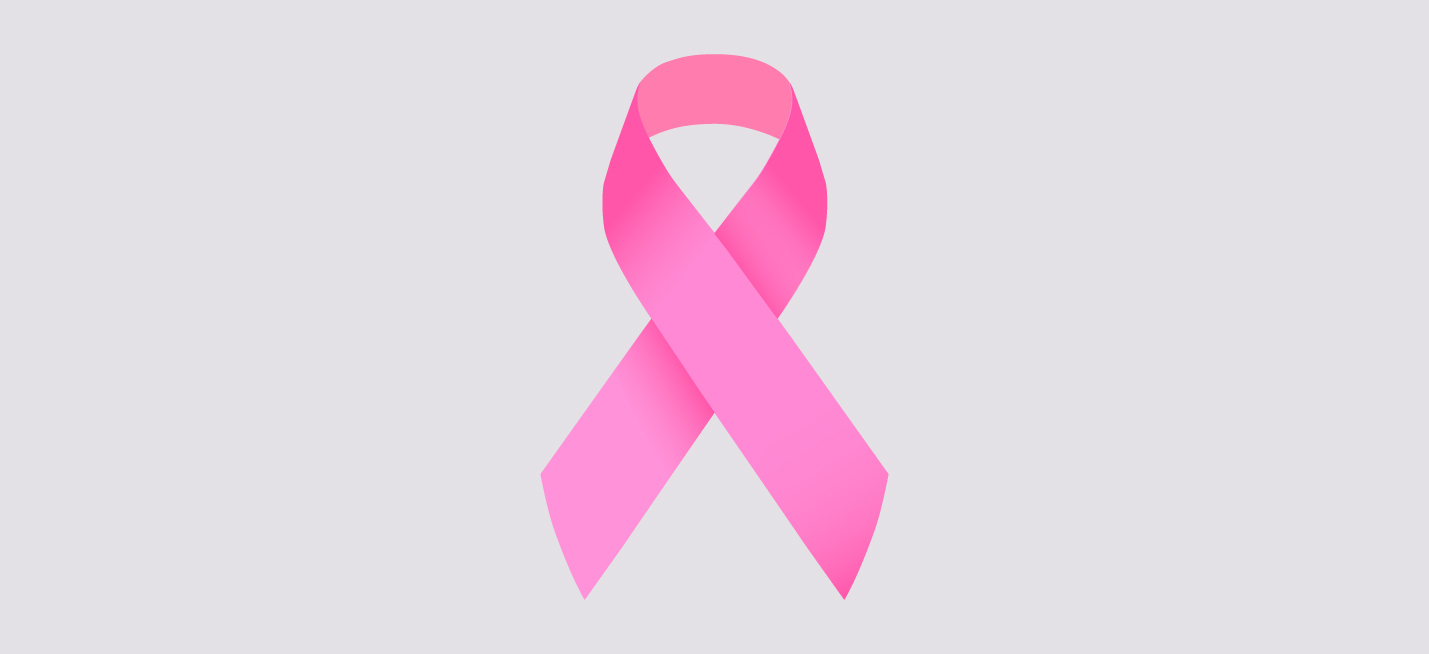

In [1]:
# Inporting the Dependencies
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [2]:
# Data collection and Processing
breast_cancer_dataset=sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
# loadinf the data to data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [5]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Adding the 'Target' column to the dataframe
data_frame['labels']=breast_cancer_dataset.target

In [7]:
# print the rows of the Dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
# Number of columns and rows in datset
data_frame.shape

(569, 31)

In [9]:
# getting the iformation about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
# Find out the missing values in data
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
labels                     0
dtype: int64

In [11]:
# Statistical measures about data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
# Checking the Distribution of the target value
data_frame['labels'].value_counts()

1    357
0    212
Name: labels, dtype: int64

###           1----->Benign                                                                                   
###           0---->Malignant

In [13]:
data_frame.groupby('labels').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
labels,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [14]:
# Separting the Features and Target
X=data_frame.drop('labels',axis=1)
y=data_frame['labels']

In [15]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [16]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: labels, Length: 569, dtype: int32


In [17]:
#Splitting The data into Training and Testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
print("shape of X_train= ",X_train.shape)
print("shape of X_test= ",X_test.shape)
print("shape of y_train= ",y_train.shape)
print("shape of y_test= ",y_test.shape)

shape of X_train=  (455, 30)
shape of X_test=  (114, 30)
shape of y_train=  (455,)
shape of y_test=  (114,)


### Standardize the data

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

### Building The Neural Network

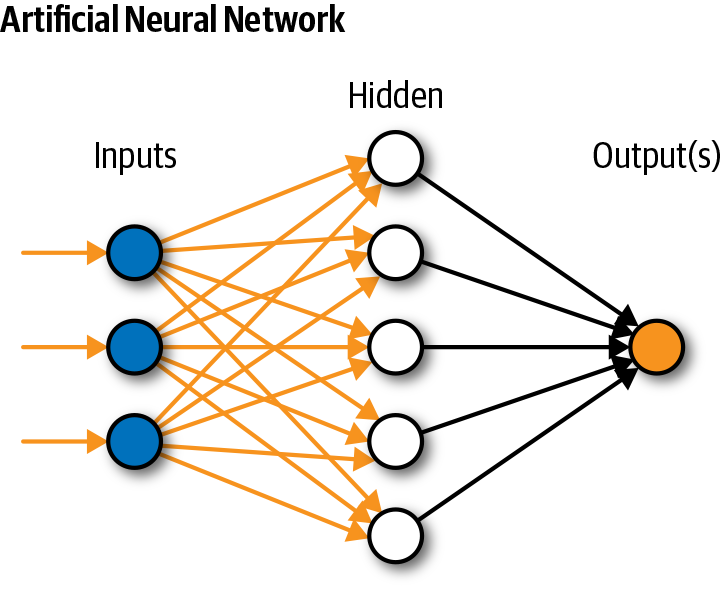

In [21]:
# Importinf the Tensorflow and Keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras import Sequential
import os

In [22]:
# Setting Up the layers of Neural Network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [23]:
# Compiling the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Training the Neural Network
history = model.fit(X_train_std, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 22ms/step - loss: 0.5260 - accuracy: 0.7531 - val_loss: 0.4602 - val_accuracy: 0.8261
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 0.3628 - accuracy: 0.8435 - val_loss: 0.3285 - val_accuracy: 0.8696
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2746 - accuracy: 0.8900 - val_loss: 0.2561 - val_accuracy: 0.9130
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.2235 - accuracy: 0.9120 - val_loss: 0.2117 - val_accuracy: 0.9130
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1895 - accuracy: 0.9242 - val_loss: 0.1828 - val_accuracy: 0.9348
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1672 - accuracy: 0.9340 - val_loss: 0.1617 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1498 - accuracy: 0.9462 - val_loss: 0.1464 - val_accuracy: 0.9565
Epoch 8/10
13/13 [=

### Visualizing Accuracy and Loss

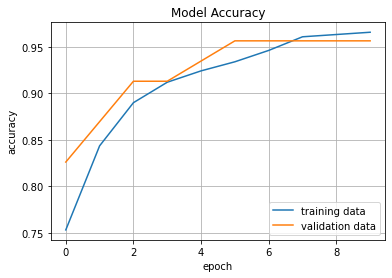

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend(['training data','validation data'],loc='lower right')
plt.grid(True)
plt.show()

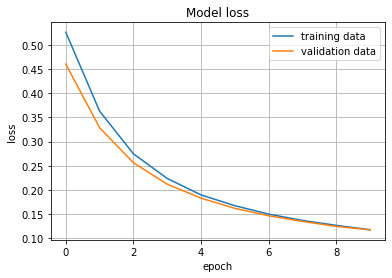

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['training data','validation data'],loc='upper right')
plt.grid(True)
plt.show()

## Accuracy of the model test data

In [30]:
loss, accuracy = model.evaluate(X_test_std, y_test)
print(accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.9474
0.9473684430122375


In [31]:
print(X_test_std.shape)

(114, 30)


In [32]:
print(X_test_std[0])

[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [33]:
y_pred=model.predict(X_test_std)

4/4 [==============================] - 0s 2ms/step


In [34]:
print(y_pred.shape)

(114, 2)


In [35]:
print(y_pred[0])

[0.2178599 0.7762431]


In [36]:
print(y_pred)

[[0.2178599  0.7762431 ]
 [0.5626798  0.63285077]
 [0.35293412 0.9929622 ]
 [0.99996537 0.00511932]
 [0.49643734 0.59736764]
 [0.9975591  0.05373527]
 [0.4450599  0.90006924]
 [0.41442472 0.99444544]
 [0.39815792 0.9633028 ]
 [0.2764643  0.94595486]
 [0.5824456  0.6304383 ]
 [0.52554864 0.9207109 ]
 [0.3013396  0.7595161 ]
 [0.458937   0.8443484 ]
 [0.3322548  0.9810274 ]
 [0.8593975  0.26730505]
 [0.38427112 0.9650101 ]
 [0.3252799  0.96747965]
 [0.24036741 0.9338553 ]
 [0.9951062  0.06875033]
 [0.07048646 0.9787607 ]
 [0.48779267 0.9830328 ]
 [0.36612523 0.96597147]
 [0.32396245 0.9858014 ]
 [0.3612912  0.79618126]
 [0.97209394 0.09099172]
 [0.52645534 0.9332479 ]
 [0.57282174 0.55607766]
 [0.9459122  0.12471453]
 [0.9613672  0.1340402 ]
 [0.3623571  0.8853719 ]
 [0.3382602  0.968     ]
 [0.3232333  0.9637326 ]
 [0.9997745  0.02804378]
 [0.9937087  0.04559113]
 [0.4200767  0.79474187]
 [0.4252276  0.9913073 ]
 [0.5247338  0.9049497 ]
 [0.5214094  0.99252117]
 [0.5129223  0.9589467 ]


model.predict() gives the predtiction probability of ech class for the data point

In [41]:
# argmax function 
my_list=[0.26,0.56]

index_of_max_value=np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.26, 0.56]
1


In [40]:
# Converting the predict probabilty  to class labels
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


### Building the predctive system

In [43]:
input_data1=(12.18,17.84,77.79,451.1,0.1045,0.07057,0.0249,0.02941,0.19,0.06635,0.3661,1.511,2.41,24.44,0.005433,0.01179,0.01131,0.01519,0.0222,0.003408,12.83,20.92,82.14,495.2,0.114,0.09358,0.0498,0.05882,0.2227,0.07376)
# change the input data to a numpy array 
input_data1_as_numpy_array=np.array(input_data1)
# reshape the numpy array as we are the predicting for one data point
input_data1_reshaped=input_data1_as_numpy_array.reshape(1,-1)

# standardizing the input data 
input_data1_std=scaler.transform(input_data1_reshaped)

prediction=model.predict(input_data1_std)
print(prediction)

prediction_label=[np.argmax(prediction)]

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 33ms/step
[[0.46815133 0.97537345]]
The tumor is Benign


C:\Users\Pranav\.continuum\ppp\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [47]:
input_data2=(18.65,17.6,123.7,1076,0.1099,0.1686,0.1974,0.1009,0.1907,0.06049,0.6289,0.6633,4.293,71.56,0.006294,0.03994,0.05554,0.01695,0.02428,0.003535,22.82,21.32,150.6,1567,0.1679,0.509,0.7345,0.2378,0.3799,0.09185)
# change the input data to a numpy array 
input_data2_as_numpy_array=np.array(input_data2)
# reshape the numpy array as we are the predicting for one data point
input_data2_reshaped=input_data2_as_numpy_array.reshape(1,-1)

# standardizing the input data 
input_data2_std=scaler.transform(input_data2_reshaped)

prediction=model.predict(input_data2_std)
print(prediction)

prediction_label=[np.argmax(prediction)]

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 28ms/step
[[0.9909574 0.0900639]]
The tumor is Malignant


C:\Users\Pranav\.continuum\ppp\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
